# Cutout Segment Transform
This notebook demonstrates a new data augmentation method that uses segmentation masks to cutout the diver from the background.

## Imports

In [26]:
%load_ext autoreload
%autoreload 2

import os
import torch

import diveslowlearnfast as dlf
import matplotlib.pyplot as plt

from diveslowlearnfast.transforms import KwargsCompose, CutoutSegment, ToTensor4D, Permute

from pytorchvideo.transforms import Div255

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
vidnames = ['3qq031609lA_00002', 'iv0Gu1VXAgc_00167', 'aektxm8cLdo_00000']

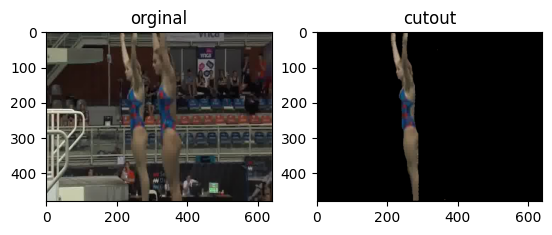

In [25]:
transform = KwargsCompose([
    CutoutSegment(dataset_path='data/Segments')
])
vidname = vidnames[0]
x = dlf.read_video_jpeg(f'data/JPEGImages/{vidname}')
y = transform(x, vidname=vidname)

idx = 20
ax = plt.subplot(1, 2, 1)
ax.imshow(x[idx])
ax.set_title('orginal')

ax = plt.subplot(1, 2, 2)
ax.imshow(y[idx])
ax.set_title('cutout')

plt.show()

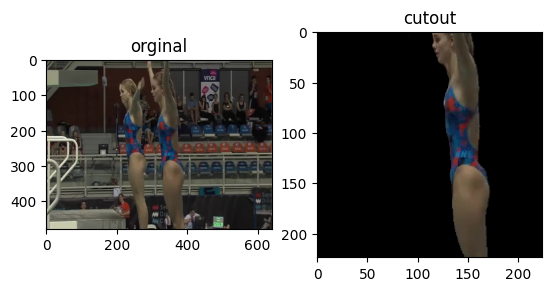

In [143]:
from pytorchvideo.transforms import RandomShortSideScale
from torchvision.transforms.v2 import RandomCrop

# a more realistic scenario with multiple transforms
transform = KwargsCompose([
    ToTensor4D(),
    CutoutSegment(dataset_path='data/Segments'),
    Permute(3, 0, 1, 2),  # From T x H X W x 3 -> 3 x T x H x W
    Div255(),
    RandomShortSideScale(
        min_size=256,
        max_size=320,
    ),
    RandomCrop(224)
])

y = transform(x, vidname=vidname).permute(1, 2, 3, 0)

idx = 0
ax = plt.subplot(1, 2, 1)
ax.imshow(x[idx])
ax.set_title('orginal')

ax = plt.subplot(1, 2, 2)
ax.imshow(y[idx])
ax.set_title('cutout')

plt.show()